<a href="https://colab.research.google.com/github/mvdj/mvdj.github.io/blob/master/QualidadeVinho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Qualidade Vinho (Red and White)**

Dataset (https://archive.ics.uci.edu/ml/datasets/wine+quality) com 8096 instâncias de dados sobre a qualidade dos vinhos (Red and White), com os seguintes atributos:

1. wine type
2. fixed acidity
3. volatile acidity
4. citric acid
5. residual sugar
6. chlorides
7. free sulfur dioxide
8. total sulfur dioxide
9. density
10. pH
11. sulphates
12. alcohol
Output variable (based on sensory data): 
13. quality (score between 0 and 10)




In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


# **1. Importação das bibliotecas**


In [ ]:
# Importando bibliotecas
import numpy as np
import pandas as pd

# **2. Carregamento dos dados na memória utilizando a biblioteca Pandas**

Utilizei um DataFrame Pandas para ler os dados do dataset winequality-whiteAndRed.csv

In [ ]:
# lendo csv e armazenando em um dataframe
dados = pd.read_csv('/content/drive/My Drive/Colab Notebooks/dataSets/QualidadeVinho/winequality-whiteAndRed.csv')

In [ ]:
# verificando o dataframe
dados.head(5)

,wine type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,45.00,45.0,170.0,1001.0000,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,49.00,14.0,132.0,994.0000,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.05,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,58.00,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,58.00,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
#verificando colunas dos dados
dados.columns

Index(['wine type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [ ]:
#verificar a quantidade de instâncias
dados.count

<bound method DataFrame.count of      wine type  fixed acidity  volatile acidity  ...  sulphates  alcohol  quality
0        white            7.0              0.27  ...       0.45      8.8        6
1        white            6.3              0.30  ...       0.49      9.5        6
2        white            8.1              0.28  ...       0.44     10.1        6
3        white            7.2              0.23  ...       0.40      9.9        6
4        white            7.2              0.23  ...       0.40      9.9        6
...        ...            ...               ...  ...        ...      ...      ...
8091       red            6.2              0.60  ...       0.58     10.5        5
8092       red            5.9              0.55  ...       0.76     11.2        6
8093       red            6.3              0.51  ...       0.75     11.0        6
8094       red            5.9            645.00  ...       0.71     10.2        5
8095       red            6.0              0.31  ...       0.66  

# **3. Limpeza e organização dos dados**

In [ ]:
#verificar e eliminar se existem valores NAN, ? e/ou faltantes
dados = dados.dropna()

In [ ]:
#eliminar colunas irrelevantes para o contexto
dados = dados.drop(columns=['density']) # atributo com valores desproporcional

In [ ]:
#verificar quantidade de instâncias sem valores NAN, ? e/ou faltantes
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8096 entries, 0 to 8095
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   wine type             8096 non-null   object 
 1   fixed acidity         8096 non-null   float64
 2   volatile acidity      8096 non-null   float64
 3   citric acid           8096 non-null   float64
 4   residual sugar        8096 non-null   float64
 5   chlorides             8096 non-null   float64
 6   free sulfur dioxide   8096 non-null   float64
 7   total sulfur dioxide  8096 non-null   float64
 8   pH                    8096 non-null   float64
 9   sulphates             8096 non-null   float64
 10  alcohol               8096 non-null   float64
 11  quality               8096 non-null   int64  
dtypes: float64(10), int64(1), object(1)
memory usage: 822.2+ KB


In [ ]:
#trocando o tipo do atributo 'wine type'  por um tipo numerico
dados['wine type'] = dados['wine type'].replace(['white','red'],[0,1]) # 0 - para white wine | 1 - para red wine
dados.head()

,wine type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,0,7.0,0.27,0.36,20.7,45.00,45.0,170.0,3.00,0.45,8.8,6
1,0,6.3,0.30,0.34,1.6,49.00,14.0,132.0,3.30,0.49,9.5,6
2,0,8.1,0.28,0.40,6.9,0.05,30.0,97.0,3.26,0.44,10.1,6
3,0,7.2,0.23,0.32,8.5,58.00,47.0,186.0,3.19,0.40,9.9,6
4,0,7.2,0.23,0.32,8.5,58.00,47.0,186.0,3.19,0.40,9.9,6


# **4. Análise preliminar dos dados**

In [ ]:
# importando biblioteca para plotar gráficos
import matplotlib.pyplot as plt

**Histograma**
* Representação gráfica da distribuição de frequência de um conjunto de dados
* Os dados são divididos em classes e é feita uma contagem das ocorrências dos dados nessas classes

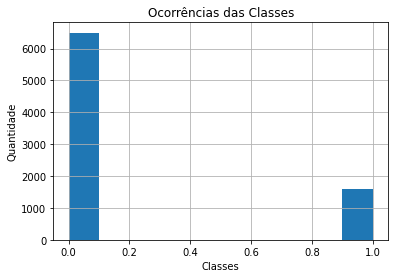

In [ ]:
#verificando ocorrências das classes
plt.hist(dados['wine type'])
plt.xlabel('Classes')
plt.ylabel('Quantidade')
plt.title('Ocorrências das Classes')
plt.grid(True)
plt.show()

**Comentários**

*Observa-se, no gráfico acima, que as classes não estão bem balanceadas.*

In [ ]:
#contando quantidades de ocorrencias de cada classe
print('White:',dados[dados['wine type']==0].shape[0])
print('Red:',dados[dados['wine type']==1].shape[0])


White: 6497
Red: 1599


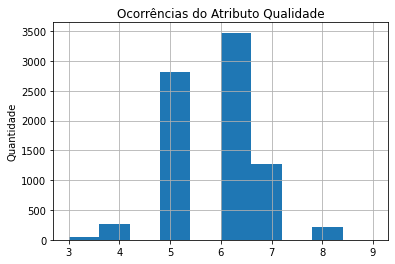

In [ ]:
#verificando ocorrências do atributo qualidade
plt.hist(dados['quality'],10)
plt.ylabel('Quantidade')
plt.title('Ocorrências do Atributo Qualidade')
plt.grid(True)
plt.show()

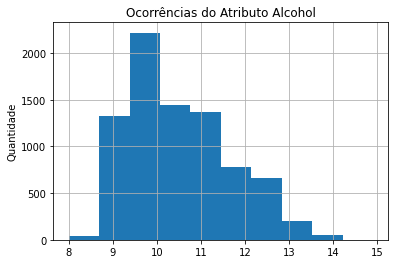

In [ ]:
#verificando ocorrências do atributo alcohol
plt.hist(dados['alcohol'],10)
plt.ylabel('Quantidade')
plt.title('Ocorrências do Atributo Alcohol')
plt.grid(True)
plt.show()

# **Distribuição de probabilidade**

* O histograma exibe frequências de ocorrências dos 
valores em n classes discretas
* A distribuição de probabilidade não discretiza os dados

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


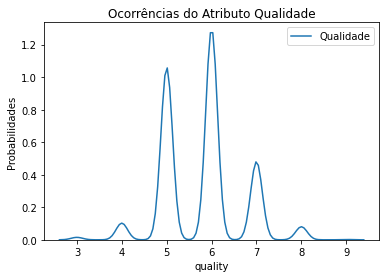

In [ ]:
import seaborn as sns

sns.distplot(dados.quality, hist=False, rug=False,label='Qualidade')
plt.ylabel('Probabilidades')
plt.title('Ocorrências do Atributo Qualidade')
plt.show()

# **BoxPlot**

* Análise visual da posição e dispersão dos dados
* Mediana e Quartis
* Pontos fora da curva

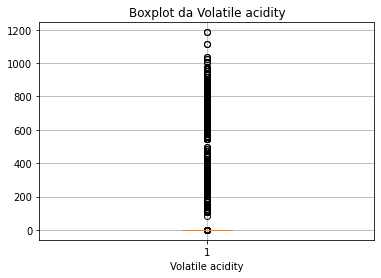

In [ ]:
plt.boxplot(dados['volatile acidity'])
plt.title('Boxplot da Volatile acidity')
plt.xlabel('Volatile acidity')
plt.grid()
plt.show()  

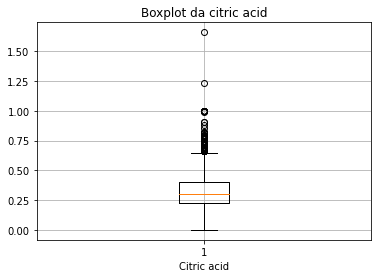

In [ ]:
plt.boxplot(dados['citric acid'])
plt.title('Boxplot da citric acid')
plt.xlabel('Citric acid')
plt.grid()
plt.show()  

**Comentários**

*Acredito que por ainda ter tido feito a reescala dos dados, há muita discrepâncias nos boxplots acima.*

# **Análise comparativa dos atributos entre as classes**

In [ ]:
#criando dataframe apenas para os WINE WHITE
white = dados[dados['wine type']==0].drop(columns=['wine type']).reset_index(drop=True)

In [ ]:
#criando dataframe apenas para os WINE RED
red = dados[dados['wine type']==1].drop(columns=['wine type']).reset_index(drop=True)

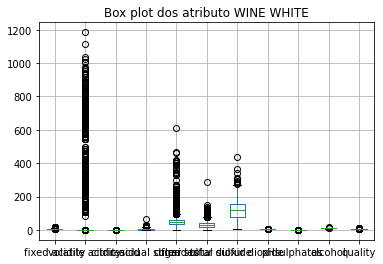

In [ ]:
#plotando boxplots dos dados das instâncias WINE WHITE
white.boxplot()
plt.title('Box plot dos atributo WINE WHITE')
plt.show()

**Comentários**

*Observa-se acima muitas discrepâncias no gráfico boxplot.*

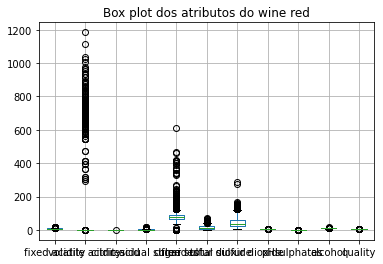

In [ ]:
#plotando boxplots dos dados das instâncias WINE RED
red.boxplot()
plt.title('Box plot dos atributos do wine red')
plt.show()

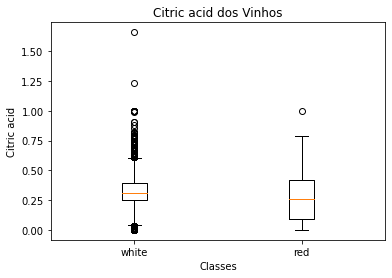

In [ ]:
# box plot comparando as 'citric acid' para as duas classes
plt.boxplot([white['citric acid'],red['citric acid']],labels=['white','red'])
plt.xlabel('Classes')
plt.ylabel('Citric acid')
plt.title('Citric acid dos Vinhos')
plt.show()

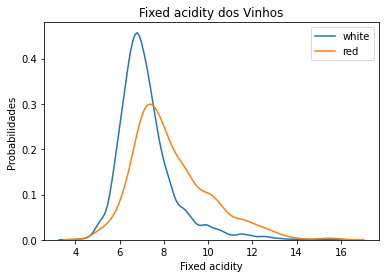

In [ ]:
# distribuição de probabilidade comparando o 'Fixed Acidity' para as duas classes
sns.distplot(white['fixed acidity'], hist=False, rug=False,label='white')
sns.distplot(red['fixed acidity'], hist=False, rug=False,label='red')
plt.xlabel('Fixed acidity')
plt.ylabel('Probabilidades')
plt.title('Fixed acidity dos Vinhos')
plt.show()

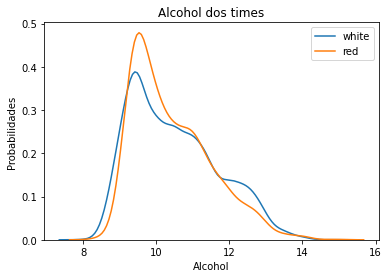

In [ ]:
# distribuição de probabilidade comparando o Alcohol para as duas classes
sns.distplot(white['alcohol'], hist=False, rug=False,label='white')
sns.distplot(red['alcohol'], hist=False, rug=False,label='red')
plt.xlabel('Alcohol')
plt.ylabel('Probabilidades')
plt.title('Alcohol dos times')
plt.show()

# **Análise estatística dos dados**


**Média**

$\mu = \dfrac{1}{n}\sum_{i=1}^n{x_i}$

In [ ]:
# estatistica basica dos dados - media
white.mean()

fixed acidity             7.215307
volatile acidity         29.488570
citric acid               0.318633
residual sugar            5.443235
chlorides                49.680363
free sulfur dioxide      30.525319
total sulfur dioxide    115.744574
pH                        3.218501
sulphates                 0.531268
alcohol                  10.491801
quality                   5.818378
dtype: float64

**Desvio padrão**

$var = \dfrac{1}{n}\sum_{i=1}^n(x_i - \mu_x)^2$

$\sigma = \sqrt{var}$

In [ ]:
# estatistica basica dos dados - desvio padrao
white.std()

fixed acidity             1.296434
volatile acidity        134.738314
citric acid               0.145318
residual sugar            4.757804
chlorides                37.118821
free sulfur dioxide      17.749400
total sulfur dioxide     56.521855
pH                        0.160787
sulphates                 0.148806
alcohol                   1.192712
quality                   0.873255
dtype: float64

In [ ]:
#media do atributo chlorides
white.chlorides.mean()

49.68036324457437

In [ ]:
#mediana do atributo chlorides
white.chlorides.median()


45.0

In [ ]:
#amplitude do atributo chlorides
'Min:',white.chlorides.max(),'Max:',white.chlorides.min()

('Min:', 611.0, 'Max:', 0.02)

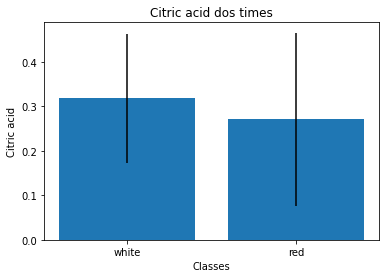

In [ ]:
# gráfico de barras comparando a média e desvio padrão do 'citric acid' para as duas classes
plt.bar(['white','red'],[white['citric acid'].mean(),red['citric acid'].mean()],yerr=[white['citric acid'].std(),red['citric acid'].std()])
plt.xlabel('Classes')
plt.ylabel('Citric acid')
plt.title('Citric acid dos times')
plt.show()

# **Estudo de correlação entre atributos**

* Estudo da relação estatística entre duas variáveis
* Como uma variável se comporta quando a outra varia
* Dá ideia de quanto de uma variável pode ser usada para explicar a outra
* Correlação não implica causalidade

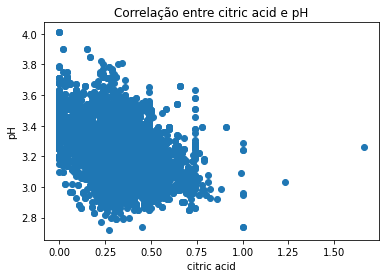

In [ ]:
# plotando correlação entre citric acid e pH
plt.scatter(dados['citric acid'],dados['pH'])
plt.xlabel('citric acid')
plt.ylabel('pH')
plt.title('Correlação entre citric acid e pH')
plt.show()

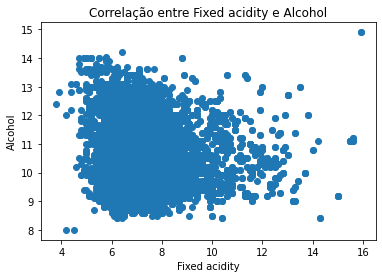

In [ ]:
# plotando correlação entre 'fixed acidity e 'Alcohol'
plt.scatter(dados['fixed acidity'],dados['alcohol'])
plt.xlabel('Fixed acidity')
plt.ylabel('Alcohol')
plt.title('Correlação entre Fixed acidity e Alcohol')
plt.show()

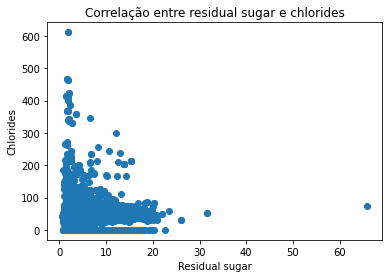

In [ ]:
# plotando correlação entre 'residual sugar' e a 'chlorides'
plt.scatter(dados['residual sugar'],dados['chlorides'])
#fixed acidity / volatile acidity / citric acid / residual sugar / chlorides / free sulfur dioxide / total sulfur dioxide / pH / 
# sulphates / alcohol / quality 
plt.xlabel('Residual sugar')
plt.ylabel('Chlorides')
plt.title('Correlação entre residual sugar e chlorides')
plt.show()

**Comentários**

*Observa-se, nos gráficos de correlação acima, que não há correlação considerável das variáveis/atributos, sendo estes destacados no gráfico de mapa de calor.*

# **Coeficiente de correlação**

* medida numérica do grau de relação entre duas variáveis quantitativas
* coeficiente de correlação de Pearson ($\rho$):

\begin{equation}
\rho = \dfrac{\sum_{i=1}^n(x_i - \overline{x})(y_i-\overline{y})}{\sqrt{\sum_{i=1}^n(x_i - \overline{x})^2}\sqrt{\sum_{i=1}^n(y_i - \overline{y})^2}} = \dfrac{cov(X,Y)}{\sqrt{var(X)var(Y)}}
\end{equation}

* varia entre [-1,1]

In [ ]:
# calculando o coeficiente de correlação entre duas colunas
corr = dados['citric acid'].corr(dados['pH'])
corr

-0.39174155707392827

In [ ]:

corr = dados['fixed acidity'].corr(dados['alcohol'])
corr

-0.08950379215248716

In [ ]:
corr = dados['residual sugar'].corr(dados['chlorides'])
corr

-0.1471202337778776

Correlação entre atributos e atributo de classe

In [ ]:
#calculando a correlacao entre um atributo descritor e o atributo de classe
corr = dados['wine type'].corr(dados.pH)
corr

0.22519141768409776

In [ ]:
#calculando a correlacao entre um atributo descritor e o atributo de classe
corr = dados['wine type'].corr(dados.quality)
corr

-0.08406171870343367

In [ ]:
#calculando a correlação entre todos os atributos e o atributo de classe
for col in dados.columns[1:]:
    print(col,': ',round(dados['wine type'].corr(dados[col]),2))

fixed acidity :  0.3
volatile acidity :  0.14
citric acid :  -0.12
residual sugar :  -0.26
chlorides :  0.26
free sulfur dioxide :  -0.33
total sulfur dioxide :  -0.46
pH :  0.23
sulphates :  0.31
alcohol :  -0.02
quality :  -0.08


In [ ]:
# correlaçao entre os atributos
corr = dados.corr()
corr

,wine type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
wine type,1.000000,0.300525,0.136908,-0.120495,-0.259255,0.264166,-0.332128,-0.463706,0.225191,0.313330,-0.023439,-0.084062
fixed acidity,0.300525,1.000000,0.049369,0.371893,-0.154328,0.262474,-0.324524,-0.376404,-0.260059,0.335976,-0.089504,-0.053189
volatile acidity,0.136908,0.049369,1.000000,-0.208200,-0.087983,0.128326,-0.154847,-0.176300,0.127877,0.063433,-0.054858,-0.135738
citric acid,-0.120495,0.371893,-0.208200,1.000000,0.154847,0.034855,0.130786,0.198063,-0.391742,0.080960,0.019362,0.125859
residual sugar,-0.259255,-0.154328,-0.087983,0.154847,1.000000,-0.147120,0.441582,0.530245,-0.288116,-0.227762,-0.305430,-0.009411
chlorides,0.264166,0.262474,0.128326,0.034855,-0.147120,1.000000,-0.208988,-0.286209,0.049598,0.341369,-0.198826,-0.145820
free sulfur dioxide,-0.332128,-0.324524,-0.154847,0.130786,0.441582,-0.208988,1.000000,0.753024,-0.183148,-0.238750,-0.148470,0.067830
total sulfur dioxide,-0.463706,-0.376404,-0.176300,0.198063,0.530245,-0.286209,0.753024,1.000000,-0.289789,-0.334423,-0.216352,-0.011823
pH,0.225191,-0.260059,0.127877,-0.391742,-0.288116,0.049598,-0.183148,-0.289789,1.000000,0.171809,0.127098,-0.013437
sulphates,0.313330,0.335976,0.063433,0.080960,-0.227762,0.341369,-0.238750,-0.334423,0.171809,1.000000,0.008075,0.051268


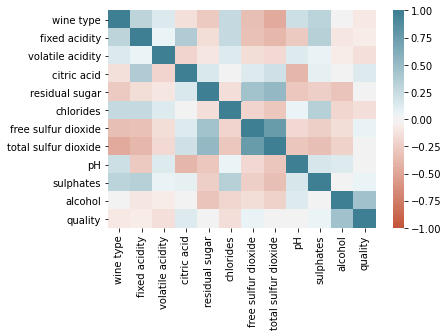

In [ ]:
#plotando coeficientes de correlação em um mapa de calor
sns.heatmap(corr,vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200))

In [ ]:
corr = dados[['wine type','fixed acidity','volatile acidity','citric acid','residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide','pH','sulphates','alcohol','quality']].corr()
corr

,wine type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
wine type,1.000000,0.300525,0.136908,-0.120495,-0.259255,0.264166,-0.332128,-0.463706,0.225191,0.313330,-0.023439,-0.084062
fixed acidity,0.300525,1.000000,0.049369,0.371893,-0.154328,0.262474,-0.324524,-0.376404,-0.260059,0.335976,-0.089504,-0.053189
volatile acidity,0.136908,0.049369,1.000000,-0.208200,-0.087983,0.128326,-0.154847,-0.176300,0.127877,0.063433,-0.054858,-0.135738
citric acid,-0.120495,0.371893,-0.208200,1.000000,0.154847,0.034855,0.130786,0.198063,-0.391742,0.080960,0.019362,0.125859
residual sugar,-0.259255,-0.154328,-0.087983,0.154847,1.000000,-0.147120,0.441582,0.530245,-0.288116,-0.227762,-0.305430,-0.009411
chlorides,0.264166,0.262474,0.128326,0.034855,-0.147120,1.000000,-0.208988,-0.286209,0.049598,0.341369,-0.198826,-0.145820
free sulfur dioxide,-0.332128,-0.324524,-0.154847,0.130786,0.441582,-0.208988,1.000000,0.753024,-0.183148,-0.238750,-0.148470,0.067830
total sulfur dioxide,-0.463706,-0.376404,-0.176300,0.198063,0.530245,-0.286209,0.753024,1.000000,-0.289789,-0.334423,-0.216352,-0.011823
pH,0.225191,-0.260059,0.127877,-0.391742,-0.288116,0.049598,-0.183148,-0.289789,1.000000,0.171809,0.127098,-0.013437
sulphates,0.313330,0.335976,0.063433,0.080960,-0.227762,0.341369,-0.238750,-0.334423,0.171809,1.000000,0.008075,0.051268


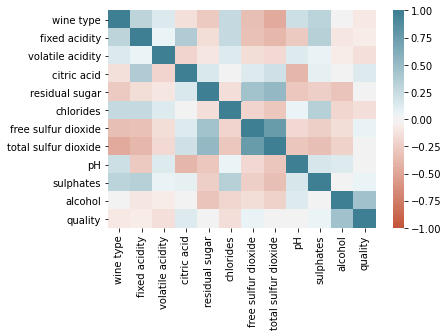

In [ ]:
sns.heatmap(corr,vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200))

**Comentários**

*Conforme já constatado nos gráficos de correlação e agora confirmados nos mapas de calor acima, há quase nenhuma correlação entre os atributos/variáveis. Os que mais se aproximam são os atributos ALCOHOL/QUALITY e TOTAL SULFUR DIOXIDE/FREE SULFUR DIOXIDE.*

# **5. Re-escala dos dados**
* Em diversas situações, os atributos posuem escalas bem diferentes
* Uma das etapas da modelagem de algorimos de aprendizage é a re-escala dos dados
* Evitar que a escala dos atributos acabem influenciando na aprendizagem

In [ ]:
#verificando dados novamente
dados.head()

,wine type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,0,7.0,0.27,0.36,20.7,45.00,45.0,170.0,3.00,0.45,8.8,6
1,0,6.3,0.30,0.34,1.6,49.00,14.0,132.0,3.30,0.49,9.5,6
2,0,8.1,0.28,0.40,6.9,0.05,30.0,97.0,3.26,0.44,10.1,6
3,0,7.2,0.23,0.32,8.5,58.00,47.0,186.0,3.19,0.40,9.9,6
4,0,7.2,0.23,0.32,8.5,58.00,47.0,186.0,3.19,0.40,9.9,6


In [ ]:
#recuperando valores de sulphates
sulphates = dados['sulphates']
sulphates

0       0.45
1       0.49
2       0.44
3       0.40
4       0.40
        ... 
8091    0.58
8092    0.76
8093    0.75
8094    0.71
8095    0.66
Name: sulphates, Length: 8096, dtype: float64

In [ ]:
#recuperando dados de chlorides
chlorides = dados.chlorides
chlorides

0       45.00
1       49.00
2        0.05
3       58.00
4       58.00
        ...  
8091     0.09
8092    62.00
8093    76.00
8094    75.00
8095    67.00
Name: chlorides, Length: 8096, dtype: float64

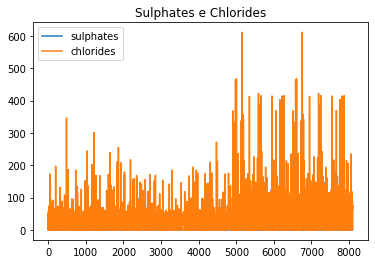

In [ ]:
#plotando sulphates e chlorides em um mesmo gráfico
plt.plot(sulphates,label='sulphates')
plt.plot(chlorides,label='chlorides')
plt.title('Sulphates e Chlorides')
plt.legend()
plt.show()

Re-escala pelo máximo

$x_{norm} = \dfrac{x}{max(x)}$

In [ ]:
sulphates = sulphates/sulphates.max()

In [ ]:
chlorides = chlorides/chlorides.max()

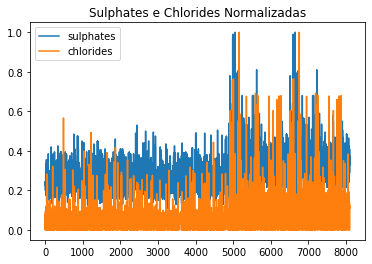

In [ ]:
#plotando sulphates e chlorides em um mesmo gráfico
plt.plot(sulphates,label='sulphates')
plt.plot(chlorides,label='chlorides')
plt.title('Sulphates e Chlorides Normalizadas')
plt.legend()
plt.show()

In [ ]:
#funcao de reescala pelo maximo
def reescalaMax(dados):
    return dados/dados.max()

Re-escala usando maximo e minimo

$x_{norm} = \dfrac{x-min(x)}{max(x)-min(x)}$

In [ ]:
#carregando dados de Sulphates e Chlorides
sulphates = dados.sulphates
chlorides = dados.chlorides

In [ ]:
sulphates = (sulphates-sulphates.min())/(sulphates.max()-sulphates.min())

In [ ]:
chlorides = (chlorides-chlorides.min())/(chlorides.max()-chlorides.min())

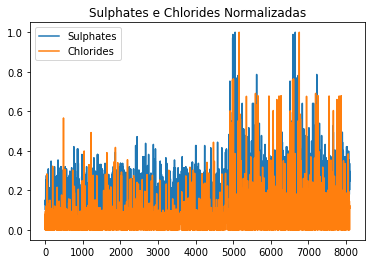

In [ ]:
#plotando Sulphates e Chlorides em um mesmo gráfico
plt.plot(sulphates,label='Sulphates')
plt.plot(chlorides,label='Chlorides')
plt.title('Sulphates e Chlorides Normalizadas')
plt.legend()
plt.show()

In [ ]:
def reescalaMaxMin(dados):
    return (dados - dados.min())/(dados.max()-dados.min())

Re-escala usando média e desvio padrão

$x_{norm} = \dfrac{(x - \mu)}{\sigma}$

In [ ]:
#carregando dados de textura e area
sulphates = dados.sulphates
chlorides = dados.chlorides

In [ ]:
sulphates = (sulphates-sulphates.mean())/sulphates.std()

In [ ]:
chlorides = (chlorides - chlorides.mean())/chlorides.std()

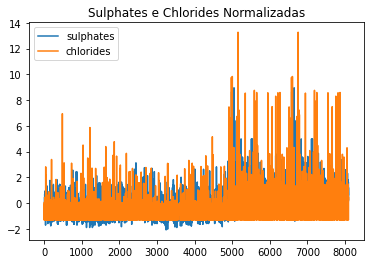

In [ ]:
#plotando textura e area em um mesmo gráfico
plt.plot(sulphates,label='sulphates')
plt.plot(chlorides,label='chlorides')
plt.title('Sulphates e Chlorides Normalizadas')
plt.legend()
#plt.show()
plt.savefig('sulphates_chlorides_norm.jpg')

**Comentários**

*Gráfico acima demostra os dados dos atributos SULPHATES e CHLORIDES sendo normalizados.*